In [105]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for model testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import libraries for ML Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Import joblib to save model
import joblib

In [106]:
#load dataset
#df = pd.read_csv(r'C:\Users\aabidh musthaq\Desktop\MAchine lea projects\Competition\Crop_Dataset.csv')
df = pd.read_csv(r"C:\Users\vishal\Downloads\Intellihack Competition\Crop_Dataset.csv")

In [107]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0


In [108]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,173,1778.191164,5.186125,tomatoes,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,141,1552.805515,4.859228,tomatoes,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,181,1622.263022,5.160909,tomatoes,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,183,1369.512711,4.853399,tomatoes,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,152,1425.538942,4.955384,tomatoes,21


### Data preprocessing

In [109]:
#Dataset Size
df.shape

(2200, 12)

In [110]:
#Check for null values
df.isnull().sum()

N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
Total_Nutrients         0
Temperature_Humidity    0
Log_Rainfall            0
Label                   0
Label_Encoded           0
dtype: int64

In [111]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label_Encoded
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,152.063636,1854.231566,4.508730,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,79.918669,699.366334,0.545400,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,17.000000,247.613182,3.054533,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,94.000000,1479.558114,4.182839,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,146.000000,1927.883340,4.562968,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,179.000000,2255.752423,4.830451,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,385.000000,4073.159566,5.702315,21.000000


In [112]:
df_without_label_encoded = df.drop('Label_Encoded', axis=1)
mean_df = df_without_label_encoded.groupby('Label').mean()
print(mean_df)

                       N       P       K  temperature   humidity        ph  \
Label                                                                        
apples             21.98   16.93   30.59    27.409892  94.844272  5.976562   
barley             77.76   48.44   19.79    22.389204  65.092249  6.245190   
beans              40.02   67.47   19.24    29.973340  65.118426  7.133952   
beets              20.07   27.18   29.92    31.208770  50.156573  5.766373   
blackcurrants      19.58   16.55   10.01    22.765725  92.170209  7.016957   
brussels_sprouts   21.44   48.01   20.23    28.194920  53.160418  6.831174   
cabbage            20.99   47.28   19.87    28.525775  85.499975  6.723957   
carrots           100.23   82.01   50.05    27.376798  80.358123  5.983893   
cauliflower        20.73   67.73   20.29    27.741762  48.061633  5.794175   
cherries           23.18  132.53  200.11    23.849575  81.875228  6.025937   
lettuce            40.09   67.79   79.92    18.872847  16.860439

In [113]:
df['Label_Encoded'].value_counts()

Label_Encoded
0     100
1     100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
2     100
21    100
Name: count, dtype: int64

In [114]:
df.duplicated().sum()

0

In [115]:
df.dtypes

N                         int64
P                         int64
K                         int64
temperature             float64
humidity                float64
ph                      float64
rainfall                float64
Total_Nutrients           int64
Temperature_Humidity    float64
Log_Rainfall            float64
Label                    object
Label_Encoded             int64
dtype: object

In [116]:
cor = df.iloc[:,:-2].corr()

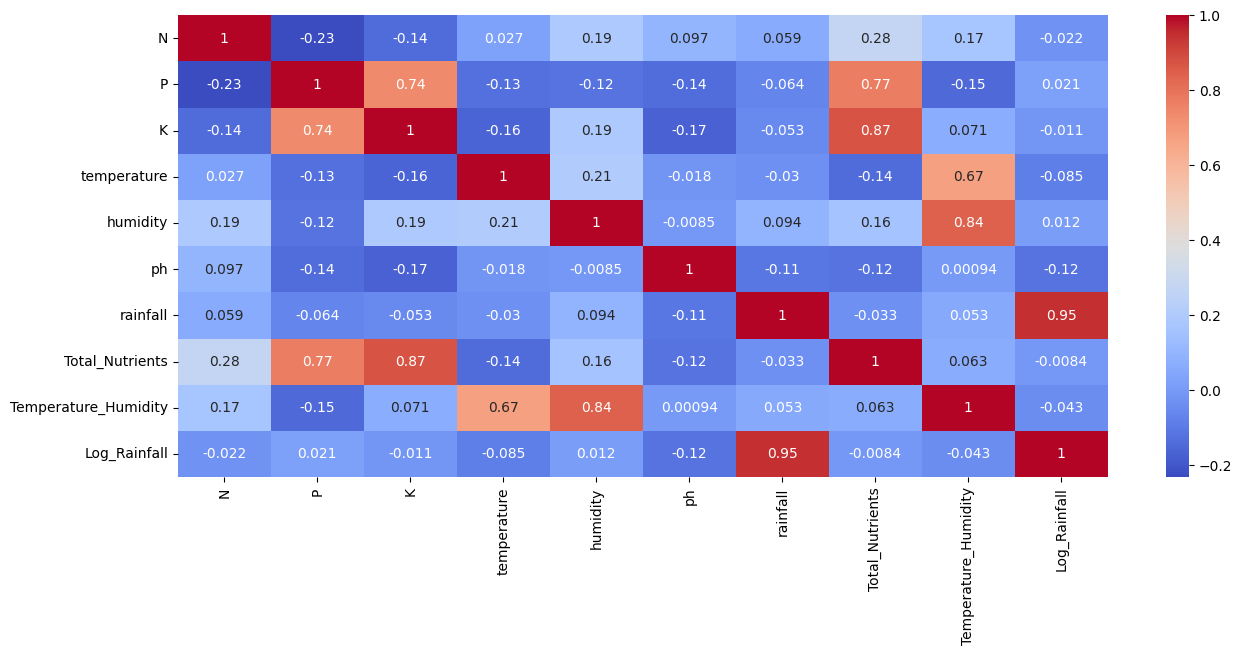

In [117]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True,cmap ='coolwarm')
plt.show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N                     2200 non-null   int64  
 1   P                     2200 non-null   int64  
 2   K                     2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Log_Rainfall          2200 non-null   float64
 10  Label                 2200 non-null   object 
 11  Label_Encoded         2200 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 206.4+ KB


In [119]:
df['Label'].unique()

array(['wheat', 'barley', 'lettuce', 'spinach', 'cauliflower',
       'brussels_sprouts', 'cabbage', 'beans', 'peas', 'turnips',
       'carrots', 'beets', 'cherries', 'plums', 'raspberries', 'pears',
       'blackcurrants', 'strawberries', 'apples', 'potatoes', 'rapeseed',
       'tomatoes'], dtype=object)

In [120]:
# Define function to categorize crops based on growth cycle
def categorize_growth_cycle(crop):
    annual_crops = ['wheat', 'barley', 'lettuce', 'spinach', 'beans', 'peas', 'carrots', 'beets', 'tomatoes']
    biennial_crops = ['cauliflower', 'brussels_sprouts', 'cabbage', 'turnips']
    perennial_crops = ['cherries', 'plums', 'raspberries', 'pears', 'blackcurrants', 'strawberries', 'apples', 'potatoes', 'rapeseed']
    
    if crop in annual_crops:
        return 'Annual'
    elif crop in biennial_crops:
        return 'Biennial'
    elif crop in perennial_crops:
        return 'Perennial'
    else:
        return 'Other'

# Apply the function to the 'label' column and create a new column 'Growth Cycle' in the DataFrame
df['Growth_Cycle'] = df['Label'].apply(categorize_growth_cycle)



In [121]:
# Define function to categorize crops based on growth season
def categorize_season(crop):
    cool_season_crops = ['wheat', 'barley', 'lettuce', 'spinach', 'cauliflower','brussels_sprouts', 'cabbage', 'peas', 'turnips', 'carrots', 'beets', 'apples', 'potatoes']
    warm_season_crops = ['beans', 'cherries', 'plums', 'raspberries', 'pears', 'blackcurrants', 'strawberries', 'rapeseed', 'tomatoes']
    
    if crop in cool_season_crops:
        return 'Cool-Season'
    elif crop in warm_season_crops:
        return 'Warm-Season'
    else:
        return 'Other'

# Apply the function to the 'label' column and create a new column 'Season' in the DataFrame
df['Season'] = df['Label'].apply(categorize_season)


In [122]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded,Growth_Cycle,Season
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0,Annual,Cool-Season
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0,Annual,Cool-Season
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0,Annual,Cool-Season
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0,Annual,Cool-Season
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0,Annual,Cool-Season


In [123]:
df['Growth_Cycle'].unique()

array(['Annual', 'Biennial', 'Perennial'], dtype=object)

In [124]:
# Define the mapping dictionary
mapping = {'Annual': 0, 'Biennial': 1, 'Perennial': 2}

# Create a new column 'Growth Cycle Code' with numerical codes
df['Growth Cycle Code'] = df['Growth_Cycle'].replace(mapping)


C:\Users\vishal\AppData\Local\Temp\ipykernel_11740\751598239.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Growth Cycle Code'] = df['Growth_Cycle'].replace(mapping)


In [125]:
df['Season'].unique()

array(['Cool-Season', 'Warm-Season'], dtype=object)

In [126]:
# Define the mapping dictionary
season_mapping = {'Cool-Season': 0, 'Warm-Season': 1}

# Encode the 'Season' column
df['Season_Code'] = df['Season'].map(season_mapping)

In [127]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded,Growth_Cycle,Season,Growth Cycle Code,Season_Code
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0,Annual,Cool-Season,0,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0,Annual,Cool-Season,0,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0,Annual,Cool-Season,0,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0,Annual,Cool-Season,0,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0,Annual,Cool-Season,0,0


In [128]:
df['Season_Code'].unique()

array([0, 1], dtype=int64)

In [129]:
df['Growth Cycle Code'].unique()

array([0, 1, 2], dtype=int64)

In [130]:
#Define Features and Target Variables
x = df.drop(['Label', 'Label_Encoded', 'Growth_Cycle', 'Season'], axis=1)
y = df['Label_Encoded']

In [131]:
#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
x_train.shape, x_test.shape, x.shape

((1760, 12), (440, 12), (2200, 12))

In [133]:
model_accuracy = []
model = []

In [134]:
# Define the dictionary of classifiers
models = {
    SVC(kernel='linear', random_state=0, gamma='auto'): 'Support Vector Classifier',
    KNeighborsClassifier(): 'K Nearest Neighbors Classifier',
    RandomForestClassifier(n_estimators=100, random_state=0): 'Random Forest Classifier',
    GradientBoostingClassifier(n_estimators=100, random_state=0): 'Gradient Boosting Classifier',
    GaussianNB(): 'Gaussian Naive Bayes',
    XGBClassifier(n_estimators=500) : 'XGB Classifier',
    DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5): 'Decision Tree Classifier'
}


In [135]:
def compare_models_train():
    for model in models:  # Iterate over each model in the models dictionary
        model.fit(x_train, y_train)  # Train the model
        train_data_prediction = model.predict(x_train)  # Predict using the trained model
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(train_data_prediction, y_train)
        precision = precision_score(train_data_prediction, y_train, average='weighted')
        recall = recall_score(train_data_prediction, y_train, average='weighted')
        f1 = f1_score(train_data_prediction,y_train, average='weighted')
        
        # Print evaluation metrics
        print(models[model], 'metrics:')
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1 Score:', f1)
        print('____________________________')

In [136]:
compare_models_train()

Support Vector Classifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
K Nearest Neighbors Classifier metrics:
Accuracy: 0.9431818181818182
Precision: 0.9460854581480643
Recall: 0.9431818181818182
F1 Score: 0.9432265864484536
____________________________
Random Forest Classifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
Gradient Boosting Classifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
Gaussian Naive Bayes metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
XGB Classifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
Decision Tree Classifier metrics:
Accuracy: 0.9551136363636363
Precision: 1.0
Recall: 0.9551136363636363
F1 Score: 0.9701999245567711
____________________________


c:\Users\vishal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
model_accuracy = []
model_name = []

def compare_models_train_test():
    for model in models:  # Iterate over each model in the models dictionary
        model.fit(x_train, y_train)  # Train the model
        test_data_prediction = model.predict(x_test)  # Predict using the trained model
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(test_data_prediction, y_test)
        precision = precision_score(test_data_prediction, y_test, average='weighted')
        recall = recall_score(test_data_prediction, y_test, average='weighted')
        f1 = f1_score(test_data_prediction, y_test, average='weighted')
        
        # Print evaluation metrics
        print(models[model], 'metrics:')
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1 Score:', f1)
        print('____________________________')

        

[]


In [139]:
compare_models_train_test()

Support Vector Classifier metrics:
Accuracy: 0.9795454545454545
Precision: 0.9802612072496983
Recall: 0.9795454545454545
F1 Score: 0.979477015234603
____________________________
K Nearest Neighbors Classifier metrics:
Accuracy: 0.8863636363636364
Precision: 0.9007247192946435
Recall: 0.8863636363636364
F1 Score: 0.88662631524455
____________________________
Random Forest Classifier metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
Gradient Boosting Classifier metrics:
Accuracy: 0.990909090909091
Precision: 0.9915207980425371
Recall: 0.990909090909091
F1 Score: 0.9909250551739465
____________________________
Gaussian Naive Bayes metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
____________________________
XGB Classifier metrics:
Accuracy: 0.9977272727272727
Precision: 0.9978354978354979
Recall: 0.9977272727272727
F1 Score: 0.9977225213810579
____________________________
Decision Tree Classifier metrics:
Accuracy: 0.95
Precision: 

c:\Users\vishal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [140]:
model = GaussianNB().fit(x_train, y_train)

# Save and Load the model
joblib.dump(model, 'model.joblib')
loaded_model = joblib.load('model.joblib')

# Loaded model to make predictions
predictions = loaded_model.predict(x_test)

# Accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 1.0
